In [1]:
print ("Hello World")

Hello World


In [46]:
import pandas as pd
import os
import concurrent.futures

def load_channel_data(file_path):

    def process_chunk(chunk):
        chunk['timestamp'] = pd.to_datetime(chunk['timestamp'].astype(float), unit='s')
        return chunk.set_index('timestamp')

    # Read the data in parallel
    with concurrent.futures.ThreadPoolExecutor() as executor:
        data = pd.read_csv(
            file_path,
            sep=' ',
            header=None,
            names=['timestamp', 'power'],
            chunksize=100000  # Adjust this value based on your system's memory
        )
        
        processed_chunks = list(executor.map(process_chunk, data))

    # Combine the processed chunks
    return pd.concat(processed_chunks)

# Example usage:
# data_dir = r'C:\Users\hboki\OneDrive - ku.ac.ae\UK-DALE\house_1'
# channel = 'channel_5.dat'  # Washing Machine
# data = load_channel_data(data_dir, channel)


In [26]:
data_dir = r'C:\Users\hboki\OneDrive - ku.ac.ae\UK-DALE\house_1'
# Define the file paths for the washing machine and kitchen lights
washing_machine_file = os.path.join(data_dir, 'channel_5.dat')  # Washing Machine
kitchen_lights_file = os.path.join(data_dir, 'channel_8.dat')   # Kitchen Lights
channel_4_file = os.path.join(data_dir, 'channel_4.dat')   # Dishwasher


In [27]:
# Read the washing machine data
data_washing_machine = load_channel_data(data_dir, washing_machine_file)
data_kitchen_lights = load_channel_data(data_dir, kitchen_lights_file)
data_dishwasher = load_channel_data(data_dir, channel_4_file)


In [34]:
print(data_washing_machine)
print(data_kitchen_lights)
print(data_dishwasher)


                     power
timestamp                 
2012-11-09 22:28:18      0
2012-11-09 22:28:24      0
2012-11-09 22:28:30      0
2012-11-09 22:28:36      0
2012-11-09 22:28:42      0
...                    ...
2015-01-05 06:24:49      0
2015-01-05 06:24:55      0
2015-01-05 06:25:02      0
2015-01-05 06:25:10      0
2015-01-05 06:25:18      0

[9194001 rows x 1 columns]


In [30]:
# Check for missing values in washing machine data
print("Missing values in Washing Machine Data:")
print(data_washing_machine.isnull().sum())

# Check for missing values in kitchen lights data
print("\nMissing values in Kitchen Lights Data:")
print(data_kitchen_lights.isnull().sum())


Missing values in Washing Machine Data:
power    0
dtype: int64

Missing values in Kitchen Lights Data:
power    0
dtype: int64


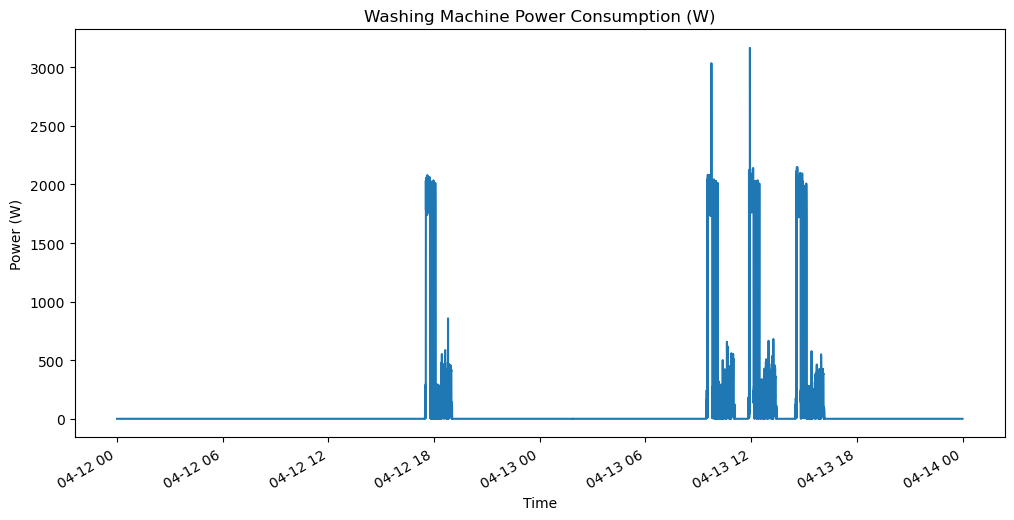

In [32]:
import matplotlib.pyplot as plt
# Define a date range for plotting
start_date = '2013-04-12'
end_date = '2013-04-13'

# Plot the washing machine data
plt.figure(figsize=(12, 6))
data_washing_machine.loc[start_date:end_date]['power'].plot()
plt.title('Washing Machine Power Consumption (W)')
plt.ylabel('Power (W)')
plt.xlabel('Time')
plt.show()


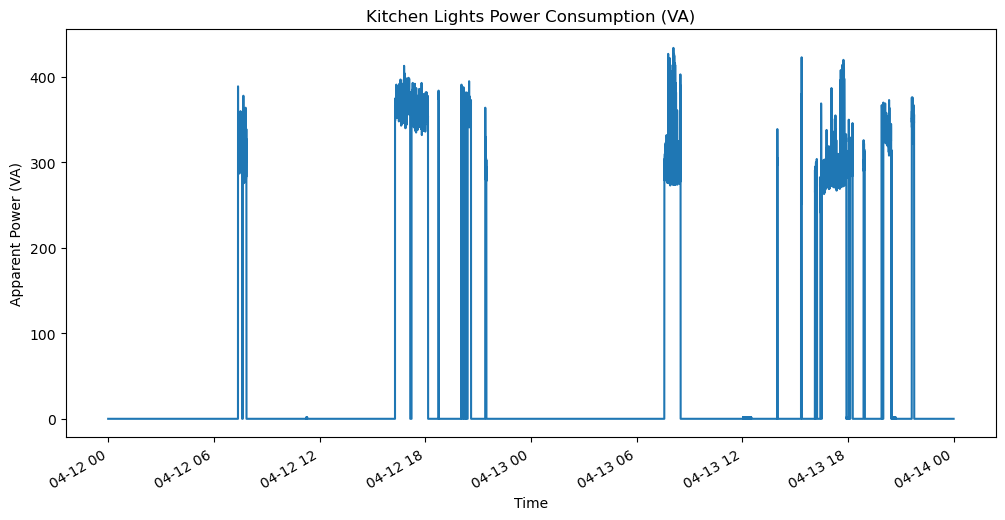

In [33]:
# Plot the kitchen lights data
plt.figure(figsize=(12, 6))
data_kitchen_lights.loc[start_date:end_date]['power'].plot()
plt.title('Kitchen Lights Power Consumption (VA)')
plt.ylabel('Apparent Power (VA)')
plt.xlabel('Time')
plt.show()


In [35]:
# Print summary statistics for washing machine
print("Washing Machine Data Statistics:")
print(data_washing_machine['power'].describe())

# Print summary statistics for kitchen lights
print("\nKitchen Lights Data Statistics:")
print(data_kitchen_lights['power'].describe())


Washing Machine Data Statistics:
count    9.194001e+06
mean     2.930153e+01
std      2.082139e+02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.999000e+03
Name: power, dtype: float64

Kitchen Lights Data Statistics:
count    1.022312e+07
mean     2.085147e+01
std      6.375192e+01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.000000e+00
max      1.325000e+03
Name: power, dtype: float64


In [36]:
import yaml

# Load house metadata
with open(r'C:\Users\hboki\OneDrive - ku.ac.ae\UK-DALE\metadata\building1.yaml', 'r') as f:
    house_metadata = yaml.safe_load(f)

# Load meter devices metadata
with open(r'C:\Users\hboki\OneDrive - ku.ac.ae\UK-DALE\metadata\meter_devices.yaml', 'r') as f:
    meter_devices = yaml.safe_load(f)


In [39]:
print(house_metadata)
print (meter_devices)



{'appliances': [{'description': 'includes all electronics associated with the boiler including the central heating pump, the hot water pump, the bathroom underfloor heating pump, the boiler controller, the boiler itself. Over winter the central heating is on 24 hrs and is controlled by our portable wireless thermostat which is usually set at 18-20 degrees C and is put in the room we want to be the most comfortable. Prior to 3rd May 2013, the hot water was set to come on from 0630-0700 and 1630-1700.  After 3rd May the HW comes on 0650-0700 and 1650-1700.', 'distributions': {'on_power': [{'model': {'distribution_name': 'normal', 'mu': 73, 'sigma': 12}}]}, 'efficiency_rating': {'certification_name': 'SEDBUK', 'rating': 'A'}, 'fuel': 'natural gas', 'instance': 1, 'manufacturer': 'Worcester~Greenstar', 'meters': [2], 'model': '30CDi Conventional natural gas', 'nominal_consumption': {'on_power': 70}, 'original_name': 'boiler', 'part_number': '41-311-71', 'room': 'bathroom', 'subtype': 'syst

In [40]:
# Extract the elec_meters dictionary
elec_meters = house_metadata['elec_meters']

# Example: Print the keys (meter IDs)
print(elec_meters.keys())


dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54])


In [41]:
# Create a dictionary mapping meter IDs to appliances
meter_to_appliance = {}

for appliance in house_metadata['appliances']:
    meters = appliance.get('meters', [])
    for meter_id in meters:
        if meter_id not in meter_to_appliance:
            meter_to_appliance[meter_id] = []
        meter_to_appliance[meter_id].append(appliance)

print(meter_to_appliance)


{2: [{'description': 'includes all electronics associated with the boiler including the central heating pump, the hot water pump, the bathroom underfloor heating pump, the boiler controller, the boiler itself. Over winter the central heating is on 24 hrs and is controlled by our portable wireless thermostat which is usually set at 18-20 degrees C and is put in the room we want to be the most comfortable. Prior to 3rd May 2013, the hot water was set to come on from 0630-0700 and 1630-1700.  After 3rd May the HW comes on 0650-0700 and 1650-1700.', 'distributions': {'on_power': [{'model': {'distribution_name': 'normal', 'mu': 73, 'sigma': 12}}]}, 'efficiency_rating': {'certification_name': 'SEDBUK', 'rating': 'A'}, 'fuel': 'natural gas', 'instance': 1, 'manufacturer': 'Worcester~Greenstar', 'meters': [2], 'model': '30CDi Conventional natural gas', 'nominal_consumption': {'on_power': 70}, 'original_name': 'boiler', 'part_number': '41-311-71', 'room': 'bathroom', 'subtype': 'system', 'type'

In [42]:
# Print the mapping
for meter_id, appliances in meter_to_appliance.items():
    print(f"Meter ID: {meter_id}")
    for appliance in appliances:
        print(f"  Appliance: {appliance.get('original_name')} ({appliance.get('type')})")


Meter ID: 2
  Appliance: boiler (boiler)
Meter ID: 3
  Appliance: solar_thermal_pump (solar thermal pumping station)
Meter ID: 4
  Appliance: laptop (laptop computer)
  Appliance: laptop (laptop computer)
Meter ID: 5
  Appliance: washing_machine (washer dryer)
Meter ID: 6
  Appliance: dishwasher (dish washer)
Meter ID: 7
  Appliance: tv (television)
Meter ID: 8
  Appliance: kitchen_lights (light)
  Appliance: kitchen_lights (light)
Meter ID: 9
  Appliance: htpc (HTPC)
Meter ID: 10
  Appliance: kettle (kettle)
  Appliance: kettle (food processor)
  Appliance: kettle (toasted sandwich maker)
Meter ID: 11
  Appliance: toaster (toaster)
  Appliance: toaster (kitchen aid)
  Appliance: toaster (food processor)
Meter ID: 12
  Appliance: fridge (fridge freezer)
Meter ID: 13
  Appliance: microwave (microwave)
Meter ID: 14
  Appliance: lcd_office (computer monitor)
Meter ID: 15
  Appliance: hifi_office (audio system)
Meter ID: 16
  Appliance: breadmaker (breadmaker)
Meter ID: 17
  Appliance: amp

In [43]:
# Initialize a list to store combined meter and appliance info
meter_appliance_info = []

for meter_id, meter_info in elec_meters.items():
    meter_id = int(meter_id)  # Ensure the meter ID is an integer
    # Get data location and device model
    data_location = meter_info.get('data_location')
    device_model = meter_info.get('device_model')
    
    # Get measurement type from meter_devices.yaml
    device_details = meter_devices.get(device_model, {})
    measurements = device_details.get('measurements', [])
    if measurements:
        measurement_type = measurements[0].get('type', 'unknown')
    else:
        measurement_type = 'unknown'
    
    # Get appliances associated with this meter
    appliances = meter_to_appliance.get(meter_id, [])
    appliance_names = [appliance.get('original_name') for appliance in appliances]
    appliance_types = [appliance.get('type') for appliance in appliances]
    
    # Store the combined info
    meter_appliance_info.append({
        'meter_id': meter_id,
        'data_location': data_location,
        'device_model': device_model,
        'measurement_type': measurement_type,
        'appliance_names': appliance_names,
        'appliance_types': appliance_types
    })


In [44]:
# Print the combined information
for info in meter_appliance_info:
    print(f"Meter ID: {info['meter_id']}")
    print(f"  Data Location: {info['data_location']}")
    print(f"  Device Model: {info['device_model']}")
    print(f"  Measurement Type: {info['measurement_type']}")
    print(f"  Appliances: {info['appliance_names']}")
    print(f"  Appliance Types: {info['appliance_types']}")
    print()


Meter ID: 1
  Data Location: house_1/channel_1.dat
  Device Model: EcoManagerWholeHouseTx
  Measurement Type: apparent
  Appliances: []
  Appliance Types: []

Meter ID: 2
  Data Location: house_1/channel_2.dat
  Device Model: CurrentCostTx
  Measurement Type: apparent
  Appliances: ['boiler']
  Appliance Types: ['boiler']

Meter ID: 3
  Data Location: house_1/channel_3.dat
  Device Model: CurrentCostTx
  Measurement Type: apparent
  Appliances: ['solar_thermal_pump']
  Appliance Types: ['solar thermal pumping station']

Meter ID: 4
  Data Location: house_1/channel_4.dat
  Device Model: EcoManagerTxPlug
  Measurement Type: active
  Appliances: ['laptop', 'laptop']
  Appliance Types: ['laptop computer', 'laptop computer']

Meter ID: 5
  Data Location: house_1/channel_5.dat
  Device Model: EcoManagerTxPlug
  Measurement Type: active
  Appliances: ['washing_machine']
  Appliance Types: ['washer dryer']

Meter ID: 6
  Data Location: house_1/channel_6.dat
  Device Model: EcoManagerTxPlug
  M

In [50]:
def load_meter_data(data_location, measurement_type):
    file_path = os.path.join(r'C:\Users\hboki\OneDrive - ku.ac.ae\UK-DALE', data_location)
    
    # Read the data
    data = load_channel_data(file_path)
    
    # Add measurement type
    data['measurement_type'] = measurement_type
    
    return data


In [51]:
# Initialize a dictionary to store data for each meter
meter_data = {}

for info in meter_appliance_info:
    meter_id = info['meter_id']
    data_location = info['data_location']
    measurement_type = info['measurement_type']
    
    # Load the data
    data = load_meter_data(data_location, measurement_type)
    
    # Store the data
    meter_data[meter_id] = {
        'data': data,
        'appliance_names': info['appliance_names'],
        'appliance_types': info['appliance_types'],
        'measurement_type': measurement_type
    }


In [52]:
meter_data

{1: {'data':                      power measurement_type
  timestamp                                  
  2012-11-09 22:28:15    599         apparent
  2012-11-09 22:28:21    582         apparent
  2012-11-09 22:28:27    600         apparent
  2012-11-09 22:28:33    586         apparent
  2012-11-09 22:28:40    596         apparent
  ...                    ...              ...
  2015-01-05 06:15:21    201         apparent
  2015-01-05 06:15:27    201         apparent
  2015-01-05 06:15:34    201         apparent
  2015-01-05 06:15:40    202         apparent
  2015-01-05 06:15:46    203         apparent
  
  [10239433 rows x 2 columns],
  'appliance_names': [],
  'appliance_types': [],
  'measurement_type': 'apparent'},
 2: {'data':                      power measurement_type
  timestamp                                  
  2012-11-09 22:28:23     62         apparent
  2012-11-09 22:28:35     62         apparent
  2012-11-09 22:28:47     57         apparent
  2012-11-09 22:29:17     57   

In [53]:
import pickle
import os

# Define the directory to save the data
save_dir = 'processed_data'

# Create the directory if it doesn't exist
os.makedirs(save_dir, exist_ok=True)

# Define the file path
file_path = os.path.join(save_dir, 'meter_data.pkl')

# Save the meter_data dictionary to disk
with open(file_path, 'wb') as f:
    pickle.dump(meter_data, f)

print(f"Meter data has been saved to {file_path}")


Meter data has been saved to processed_data\meter_data.pkl


In [55]:
for meter_id, meter_info in meter_data.items():
    appliances = meter_info['appliance_names']
    appliance_types = meter_info['appliance_types']
    data = meter_info['data']
    
    # Example: Add nominal consumption if available
    nominal_powers = []
    for appliance in appliances:
        # Find the appliance in the appliances list
        for app in house_metadata['appliances']:
            if app.get('original_name') == appliance:
                nominal_power = app.get('nominal_consumption', {}).get('on_power')
                if nominal_power is not None:
                    nominal_powers.append(nominal_power)
                break
    
    # Add nominal power to the data if available
    if nominal_powers:
        # If multiple appliances, take the average or handle appropriately
        avg_nominal_power = sum(nominal_powers) / len(nominal_powers)
        data['nominal_power'] = avg_nominal_power
    else:
        data['nominal_power'] = None


In [57]:
# # Initialize an empty DataFrame with a suitable time index
# # For example, use the time index of the aggregate meter (meter ID 1)
# aggregate_data = meter_data[1]['data']
# combined_data = pd.DataFrame(index=pd.Index(aggregate_data.index.unique(), name='timestamp'))

# # Add power data from each meter
# for meter_id, meter_info in meter_data.items():
#     data = meter_info['data']
#     appliance_names = '_'.join(meter_info['appliance_names'])
#     measurement_type = meter_info['measurement_type']
    
#     # Use a unique column name
#     column_name = f"meter_{meter_id}_{appliance_names}"
    
#     # Remove duplicate indices before reindexing
#     data = data[~data.index.duplicated(keep='first')]
    
#     # Reindex data to match the combined_data index
#     data_reindexed = data.reindex(combined_data.index, method='nearest', tolerance='1s')
    
#     # Add the power data
#     combined_data[column_name] = data_reindexed['power']
    
#     # Add additional metadata as needed
#     # For example, measurement type
#     combined_data[f"{column_name}_measurement_type"] = measurement_type

# # Remove any remaining duplicate indices in the combined_data
# combined_data = combined_data.loc[~combined_data.index.duplicated(keep='first')]


C:\Users\hboki\AppData\Local\Temp\ipykernel_25700\351738122.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  combined_data[column_name] = data_reindexed['power']
C:\Users\hboki\AppData\Local\Temp\ipykernel_25700\351738122.py:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  combined_data[f"{column_name}_measurement_type"] = measurement_type
C:\Users\hboki\AppData\Local\Temp\ipykernel_25700\351738122.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, wh

ValueError: index must be monotonic increasing or decreasing

In [60]:
meter_data

{1: {'data':                      power measurement_type nominal_power
  timestamp                                                
  2012-11-09 22:28:15    599         apparent          None
  2012-11-09 22:28:21    582         apparent          None
  2012-11-09 22:28:27    600         apparent          None
  2012-11-09 22:28:33    586         apparent          None
  2012-11-09 22:28:40    596         apparent          None
  ...                    ...              ...           ...
  2015-01-05 06:15:21    201         apparent          None
  2015-01-05 06:15:27    201         apparent          None
  2015-01-05 06:15:34    201         apparent          None
  2015-01-05 06:15:40    202         apparent          None
  2015-01-05 06:15:46    203         apparent          None
  
  [10239433 rows x 3 columns],
  'appliance_names': [],
  'appliance_types': [],
  'measurement_type': 'apparent'},
 2: {'data':                      power measurement_type  nominal_power
  timestamp       

In [61]:
# Collect start and end times from all meters
start_times = []
end_times = []

for meter_id, meter_info in meter_data.items():
    data = meter_info['data']
    
    if not data.empty:
        start_time = data.index.min()
        end_time = data.index.max()
        
        start_times.append(start_time)
        end_times.append(end_time)

# Determine the overall timeframe for data alignment
overall_start_time = max(start_times)
overall_end_time = min(end_times)

print(f"Overall Start Time: {overall_start_time}")
print(f"Overall End Time: {overall_end_time}")

# Print some additional information about the meters
for meter_id, meter_info in meter_data.items():
    data = meter_info['data']
    appliance_names = meter_info['appliance_names']
    appliance_types = meter_info['appliance_types']
    measurement_type = meter_info['measurement_type']
    
    print(f"\nMeter ID: {meter_id}")
    print(f"Data shape: {data.shape}")
    print(f"Appliance names: {appliance_names}")
    print(f"Appliance types: {appliance_types}")
    print(f"Measurement type: {measurement_type}")
    print(f"Start time: {data.index.min()}")
    print(f"End time: {data.index.max()}")


Overall Start Time: 2013-10-22 14:40:57
Overall End Time: 1970-01-01 03:12:44.250000

Meter ID: 1
Data shape: (10239433, 3)
Appliance names: []
Appliance types: []
Measurement type: apparent
Start time: 2012-11-09 22:28:15
End time: 2015-01-05 06:15:46

Meter ID: 2
Data shape: (10066552, 3)
Appliance names: ['boiler']
Appliance types: ['boiler']
Measurement type: apparent
Start time: 2012-11-09 22:28:23
End time: 2015-01-05 06:18:39

Meter ID: 3
Data shape: (10066448, 3)
Appliance names: ['solar_thermal_pump']
Appliance types: ['solar thermal pumping station']
Measurement type: apparent
Start time: 2012-11-09 22:28:35
End time: 2015-01-05 06:20:31

Meter ID: 4
Data shape: (2557435, 3)
Appliance names: ['laptop', 'laptop']
Appliance types: ['laptop computer', 'laptop computer']
Measurement type: active
Start time: 2012-11-16 11:29:01
End time: 2014-12-24 20:56:03

Meter ID: 5
Data shape: (9194001, 3)
Appliance names: ['washing_machine']
Appliance types: ['washer dryer']
Measurement type

In [81]:
# Exclude Meter ID: 54 from the data
meter_data_filtered = {meter_id: meter_info for meter_id, meter_info in meter_data.items() if meter_id != 54}

# Update the start and end times based on the filtered data
start_times = []
end_times = []

for meter_id, meter_info in meter_data_filtered.items():
    data = meter_info['data']
    
    if not data.empty:
        start_time = data.index.min()
        end_time = data.index.max()
        
        start_times.append(start_time)
        end_times.append(end_time)

# Recalculate the overall timeframe for data alignment
overall_start_time = max(start_times)
overall_end_time = min(end_times)

print(f"Updated Overall Start Time: {overall_start_time}")
print(f"Updated Overall End Time: {overall_end_time}")

# Print information about the remaining meters
for meter_id, meter_info in meter_data_filtered.items():
    data = meter_info['data']
    appliance_names = meter_info['appliance_names']
    appliance_types = meter_info['appliance_types']
    measurement_type = meter_info['measurement_type']
    
    print(f"\nMeter ID: {meter_id}")
    print(f"Data shape: {data.shape}")
    print(f"Appliance names: {appliance_names}")
    print(f"Appliance types: {appliance_types}")
    print(f"Measurement type: {measurement_type}")
    print(f"Start time: {data.index.min()}")
    print(f"End time: {data.index.max()}")

# Update the meter_data variable with the filtered data
meter_data = meter_data_filtered


Updated Overall Start Time: 2013-10-22 14:40:57
Updated Overall End Time: 2013-05-05 20:17:10

Meter ID: 1
Data shape: (10239433, 3)
Appliance names: []
Appliance types: []
Measurement type: apparent
Start time: 2012-11-09 22:28:15
End time: 2015-01-05 06:15:46

Meter ID: 2
Data shape: (10066552, 3)
Appliance names: ['boiler']
Appliance types: ['boiler']
Measurement type: apparent
Start time: 2012-11-09 22:28:23
End time: 2015-01-05 06:18:39

Meter ID: 3
Data shape: (10066448, 3)
Appliance names: ['solar_thermal_pump']
Appliance types: ['solar thermal pumping station']
Measurement type: apparent
Start time: 2012-11-09 22:28:35
End time: 2015-01-05 06:20:31

Meter ID: 4
Data shape: (2557435, 3)
Appliance names: ['laptop', 'laptop']
Appliance types: ['laptop computer', 'laptop computer']
Measurement type: active
Start time: 2012-11-16 11:29:01
End time: 2014-12-24 20:56:03

Meter ID: 5
Data shape: (9194001, 3)
Appliance names: ['washing_machine']
Appliance types: ['washer dryer']
Measure

In [82]:
# Exclude Meter ID: 30 from the data
meter_data_filtered = {meter_id: meter_info for meter_id, meter_info in meter_data.items() if meter_id != 30}

# Update the start and end times based on the filtered data
start_times = []
end_times = []

for meter_id, meter_info in meter_data_filtered.items():
    data = meter_info['data']
    
    if not data.empty:
        start_time = data.index.min()
        end_time = data.index.max()
        
        start_times.append(start_time)
        end_times.append(end_time)

# Recalculate the overall timeframe for data alignment
overall_start_time = max(start_times)
overall_end_time = min(end_times)

print(f"Updated Overall Start Time: {overall_start_time}")
print(f"Updated Overall End Time: {overall_end_time}")

# Print information about the remaining meters
for meter_id, meter_info in meter_data_filtered.items():
    data = meter_info['data']
    appliance_names = meter_info['appliance_names']
    appliance_types = meter_info['appliance_types']
    measurement_type = meter_info['measurement_type']
    
    print(f"\nMeter ID: {meter_id}")
    print(f"Data shape: {data.shape}")
    print(f"Appliance names: {appliance_names}")
    print(f"Appliance types: {appliance_types}")
    print(f"Measurement type: {measurement_type}")
    print(f"Start time: {data.index.min()}")
    print(f"End time: {data.index.max()}")

# Update the meter_data variable with the filtered data
meter_data = meter_data_filtered


Updated Overall Start Time: 2013-10-22 14:40:57
Updated Overall End Time: 2013-10-22 14:39:47

Meter ID: 1
Data shape: (10239433, 3)
Appliance names: []
Appliance types: []
Measurement type: apparent
Start time: 2012-11-09 22:28:15
End time: 2015-01-05 06:15:46

Meter ID: 2
Data shape: (10066552, 3)
Appliance names: ['boiler']
Appliance types: ['boiler']
Measurement type: apparent
Start time: 2012-11-09 22:28:23
End time: 2015-01-05 06:18:39

Meter ID: 3
Data shape: (10066448, 3)
Appliance names: ['solar_thermal_pump']
Appliance types: ['solar thermal pumping station']
Measurement type: apparent
Start time: 2012-11-09 22:28:35
End time: 2015-01-05 06:20:31

Meter ID: 4
Data shape: (2557435, 3)
Appliance names: ['laptop', 'laptop']
Appliance types: ['laptop computer', 'laptop computer']
Measurement type: active
Start time: 2012-11-16 11:29:01
End time: 2014-12-24 20:56:03

Meter ID: 5
Data shape: (9194001, 3)
Appliance names: ['washing_machine']
Appliance types: ['washer dryer']
Measure

In [83]:
# Exclude Meter ID: 20 from the data
meter_data_filtered = {meter_id: meter_info for meter_id, meter_info in meter_data.items() if meter_id != 20}

# Update the start and end times based on the filtered data
start_times = []
end_times = []

for meter_id, meter_info in meter_data_filtered.items():
    data = meter_info['data']
    
    if not data.empty:
        start_time = data.index.min()
        end_time = data.index.max()
        
        start_times.append(start_time)
        end_times.append(end_time)

# Recalculate the overall timeframe for data alignment
overall_start_time = max(start_times)
overall_end_time = min(end_times)

print(f"Updated Overall Start Time: {overall_start_time}")
print(f"Updated Overall End Time: {overall_end_time}")

# Print information about the remaining meters
for meter_id, meter_info in meter_data_filtered.items():
    data = meter_info['data']
    appliance_names = meter_info['appliance_names']
    appliance_types = meter_info['appliance_types']
    measurement_type = meter_info['measurement_type']
    
    print(f"\nMeter ID: {meter_id}")
    print(f"Data shape: {data.shape}")
    print(f"Appliance names: {appliance_names}")
    print(f"Appliance types: {appliance_types}")
    print(f"Measurement type: {measurement_type}")
    print(f"Start time: {data.index.min()}")
    print(f"End time: {data.index.max()}")

# Update the meter_data variable with the filtered data
meter_data = meter_data_filtered


Updated Overall Start Time: 2013-10-22 14:40:57
Updated Overall End Time: 2014-08-30 11:06:48

Meter ID: 1
Data shape: (10239433, 3)
Appliance names: []
Appliance types: []
Measurement type: apparent
Start time: 2012-11-09 22:28:15
End time: 2015-01-05 06:15:46

Meter ID: 2
Data shape: (10066552, 3)
Appliance names: ['boiler']
Appliance types: ['boiler']
Measurement type: apparent
Start time: 2012-11-09 22:28:23
End time: 2015-01-05 06:18:39

Meter ID: 3
Data shape: (10066448, 3)
Appliance names: ['solar_thermal_pump']
Appliance types: ['solar thermal pumping station']
Measurement type: apparent
Start time: 2012-11-09 22:28:35
End time: 2015-01-05 06:20:31

Meter ID: 4
Data shape: (2557435, 3)
Appliance names: ['laptop', 'laptop']
Appliance types: ['laptop computer', 'laptop computer']
Measurement type: active
Start time: 2012-11-16 11:29:01
End time: 2014-12-24 20:56:03

Meter ID: 5
Data shape: (9194001, 3)
Appliance names: ['washing_machine']
Appliance types: ['washer dryer']
Measure

In [85]:
# Group meters with common time frames
meter_groups = {}

for meter_id, meter_info in meter_data.items():
    data = meter_info['data']
    start_time = data.index.min()
    end_time = data.index.max()
    time_frame = (start_time, end_time)
    
    if time_frame not in meter_groups:
        meter_groups[time_frame] = []
    meter_groups[time_frame].append(meter_id)

# Sort groups by start time
sorted_groups = sorted(meter_groups.items(), key=lambda x: x[0][0])

# Print the groups
print("Meter groups with common time frames:")
for time_frame, meter_ids in sorted_groups:
    print(f"\nTime frame: {time_frame[0]} to {time_frame[1]}")
    print(f"Number of meters: {len(meter_ids)}")
    print("Meter IDs and Appliances:")
    for meter_id in meter_ids:
        appliance_names = meter_data[meter_id]['appliance_names']
        print(f"  Meter {meter_id}: {', '.join(appliance_names)}")

# Calculate statistics
num_groups = len(meter_groups)
avg_group_size = sum(len(group) for group in meter_groups.values()) / num_groups
largest_group = max(meter_groups.values(), key=len)
smallest_group = min(meter_groups.values(), key=len)

print(f"\nStatistics:")
print(f"Number of distinct time frames: {num_groups}")
print(f"Average number of meters per time frame: {avg_group_size:.2f}")
print(f"Largest group size: {len(largest_group)} meters")
print(f"Smallest group size: {len(smallest_group)} meters")



Meter groups with common time frames:

Time frame: 2012-11-09 22:28:15 to 2015-01-05 06:15:46
Number of meters: 1
Meter IDs and Appliances:
  Meter 1: 

Time frame: 2012-11-09 22:28:18 to 2015-01-05 06:25:18
Number of meters: 1
Meter IDs and Appliances:
  Meter 5: washing_machine

Time frame: 2012-11-09 22:28:18 to 2015-01-05 06:25:38
Number of meters: 1
Meter IDs and Appliances:
  Meter 6: dishwasher

Time frame: 2012-11-09 22:28:18 to 2015-01-05 06:26:04
Number of meters: 1
Meter IDs and Appliances:
  Meter 7: tv

Time frame: 2012-11-09 22:28:18 to 2015-01-05 06:16:04
Number of meters: 1
Meter IDs and Appliances:
  Meter 10: kettle, kettle, kettle

Time frame: 2012-11-09 22:28:23 to 2015-01-05 06:18:39
Number of meters: 1
Meter IDs and Appliances:
  Meter 2: boiler

Time frame: 2012-11-09 22:28:35 to 2015-01-05 06:20:31
Number of meters: 1
Meter IDs and Appliances:
  Meter 3: solar_thermal_pump

Time frame: 2012-11-12 18:24:46 to 2015-01-05 06:26:23
Number of meters: 1
Meter IDs and 

In [64]:
device_availability = {}

for meter_id, meter_info in meter_data.items():
    data = meter_info['data']
    # Create a series with 1s during active periods and 0s otherwise
    availability = pd.Series(1, index=data.index)
    # Reindex to a common time index later
    device_availability[meter_id] = availability


In [65]:
# Define the overall start and end times based on the earliest start and latest end
overall_start_time = min([avail.index.min() for avail in device_availability.values()])
overall_end_time = max([avail.index.max() for avail in device_availability.values()])

# Create a common time index at the desired frequency (e.g., 1-minute intervals)
time_index = pd.date_range(start=overall_start_time, end=overall_end_time, freq='1T')


C:\Users\hboki\AppData\Local\Temp\ipykernel_25700\679894169.py:6: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  time_index = pd.date_range(start=overall_start_time, end=overall_end_time, freq='1T')


In [66]:
for meter_id in device_availability:
    availability = device_availability[meter_id]
    # Reindex with fill_value=0 for periods when the device was inactive
    device_availability[meter_id] = availability.reindex(time_index, fill_value=0)


In [67]:
# Initialize the combined DataFrame
combined_data = pd.DataFrame(index=time_index)

# Add availability features
for meter_id, availability in device_availability.items():
    appliance_names = '_'.join(meter_data[meter_id]['appliance_names'])
    availability_column = f"availability_meter_{meter_id}_{appliance_names}"
    combined_data[availability_column] = availability


In [68]:
combined_data

,availability_meter_1_,availability_meter_2_boiler,availability_meter_3_solar_thermal_pump,availability_meter_4_laptop_laptop,availability_meter_5_washing_machine,availability_meter_6_dishwasher,availability_meter_7_tv,availability_meter_8_kitchen_lights_kitchen_lights,availability_meter_9_htpc,availability_meter_10_kettle_kettle_kettle,...,availability_meter_44_childs_table_lamp,availability_meter_45_childs_ds_lamp,availability_meter_46_baby_monitor_tx,availability_meter_47_battery_charger,availability_meter_48_office_lamp1,availability_meter_49_office_lamp2,availability_meter_50_office_lamp3,availability_meter_51_office_pc,availability_meter_52_office_fan,availability_meter_53_LED_printer
2012-11-09 22:28:15,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2012-11-09 22:29:15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2012-11-09 22:30:15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2012-11-09 22:31:15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2012-11-09 22:32:15,0,0,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-01-05 06:22:15,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2015-01-05 06:23:15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2015-01-05 06:24:15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2015-01-05 06:25:15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
for meter_id, meter_info in meter_data.items():
    data = meter_info['data']
    appliance_names = '_'.join(meter_info['appliance_names'])
    power_column = f"power_meter_{meter_id}_{appliance_names}"

    # Reindex power data with fill_value=0
    power_data = data['power'].reindex(time_index, fill_value=0)
    combined_data[power_column] = power_data


C:\Users\hboki\AppData\Local\Temp\ipykernel_25700\1645722263.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  combined_data[power_column] = power_data
C:\Users\hboki\AppData\Local\Temp\ipykernel_25700\1645722263.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  combined_data[power_column] = power_data
C:\Users\hboki\AppData\Local\Temp\ipykernel_25700\1645722263.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joi

In [70]:
for meter_id in meter_data.keys():
    appliance_names = '_'.join(meter_data[meter_id]['appliance_names'])
    power_column = f"power_meter_{meter_id}_{appliance_names}"
    availability_column = f"availability_meter_{meter_id}_{appliance_names}"

    # Set power to zero when the device is inactive
    combined_data.loc[combined_data[availability_column] == 0, power_column] = 0


In [71]:
# Forward-fill or interpolate missing values
combined_data.fillna(method='ffill', inplace=True)
combined_data.fillna(0, inplace=True)


C:\Users\hboki\AppData\Local\Temp\ipykernel_25700\3724726873.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  combined_data.fillna(method='ffill', inplace=True)


In [73]:
combined_data.describe()


,availability_meter_1_,availability_meter_2_boiler,availability_meter_3_solar_thermal_pump,availability_meter_4_laptop_laptop,availability_meter_5_washing_machine,availability_meter_6_dishwasher,availability_meter_7_tv,availability_meter_8_kitchen_lights_kitchen_lights,availability_meter_9_htpc,availability_meter_10_kettle_kettle_kettle,...,power_meter_44_childs_table_lamp,power_meter_45_childs_ds_lamp,power_meter_46_baby_monitor_tx,power_meter_47_battery_charger,power_meter_48_office_lamp1,power_meter_49_office_lamp2,power_meter_50_office_lamp3,power_meter_51_office_pc,power_meter_52_office_fan,power_meter_53_LED_printer
count,1.132319e+06,1.132319e+06,1.132319e+06,1.132319e+06,1.132319e+06,1.132319e+06,1.132319e+06,1.132319e+06,1.132319e+06,1.132319e+06,...,1.132319e+06,1.132319e+06,1.132319e+06,1.132319e+06,1.132319e+06,1.132319e+06,1.132319e+06,1.132319e+06,1.132319e+06,1.132319e+06
mean,1.508506e-01,1.482277e-01,1.482250e-01,3.770669e-02,1.352622e-01,1.370444e-01,1.362673e-01,1.506227e-01,1.330561e-01,1.318197e-01,...,3.613823e-03,1.325068e-02,1.569346e-03,2.525172e-02,5.231211e-02,8.541409e-02,5.004950e-02,2.421252e-01,4.102201e-02,2.973367e-02
std,3.579034e-01,3.553257e-01,3.553231e-01,1.904860e-01,3.420036e-01,3.438944e-01,3.430723e-01,3.576809e-01,3.396356e-01,3.382948e-01,...,2.213348e-01,3.626650e-01,1.141082e+00,6.805927e-01,8.463607e-01,9.151941e-01,5.861583e-01,6.079745e+00,1.116378e+00,3.640854e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.500000e+01,5.400000e+01,1.214000e+03,5.120000e+02,2.700000e+01,2.400000e+01,1.700000e+01,3.440000e+02,1.280000e+02,1.222000e+03


In [74]:
combined_data.isnull().sum()

availability_meter_1_                      0
availability_meter_2_boiler                0
availability_meter_3_solar_thermal_pump    0
availability_meter_4_laptop_laptop         0
availability_meter_5_washing_machine       0
                                          ..
power_meter_49_office_lamp2                0
power_meter_50_office_lamp3                0
power_meter_51_office_pc                   0
power_meter_52_office_fan                  0
power_meter_53_LED_printer                 0
Length: 106, dtype: int64

In [75]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1132319 entries, 2012-11-09 22:28:15 to 2015-01-05 06:26:15
Freq: min
Columns: 106 entries, availability_meter_1_ to power_meter_53_LED_printer
dtypes: int64(106)
memory usage: 924.4 MB


In [76]:
combined_data.head()

,availability_meter_1_,availability_meter_2_boiler,availability_meter_3_solar_thermal_pump,availability_meter_4_laptop_laptop,availability_meter_5_washing_machine,availability_meter_6_dishwasher,availability_meter_7_tv,availability_meter_8_kitchen_lights_kitchen_lights,availability_meter_9_htpc,availability_meter_10_kettle_kettle_kettle,...,power_meter_44_childs_table_lamp,power_meter_45_childs_ds_lamp,power_meter_46_baby_monitor_tx,power_meter_47_battery_charger,power_meter_48_office_lamp1,power_meter_49_office_lamp2,power_meter_50_office_lamp3,power_meter_51_office_pc,power_meter_52_office_fan,power_meter_53_LED_printer
2012-11-09 22:28:15,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2012-11-09 22:29:15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2012-11-09 22:30:15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2012-11-09 22:31:15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2012-11-09 22:32:15,0,0,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
